# Predict Pneumonia with Chest X Ray Images Using a CNN

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

### Organizing the paths

In [2]:
#setting up the main folder

main_fol = "data/chest_xray/"

In [3]:
#train, test folders

train_folder = os.path.join(main_fol, "train")
test_folder = os.path.join(main_fol, "test")


In [4]:
#pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

In [5]:
#creating training and test dataframes

train_list = [x for x in normal_train_images]
train_list.extend([x for x in pneumonia_train_images])

df_train = pd.DataFrame(np.concatenate([["Normal"]*len(normal_train_images),
                                       ["Pneumonia"]*len(pneumonia_train_images)]), columns=["class"])
df_train["image"] = [x for x in train_list]

test_list = [x for x in normal_test_images]
test_list.extend([x for x in pneumonia_test_images])

df_test = pd.DataFrame(np.concatenate([["Normal"]*len(normal_test_images),
                                      ["Pneumonia"]*len(pneumonia_test_images)]), columns=["class"])
df_test["image"] = [x for x in test_list]

In [6]:
df_train

,class,image
0,Normal,data/chest_xray/train/NORMAL/NORMAL-2552119-00...
1,Normal,data/chest_xray/train/NORMAL/NORMAL-7298141-00...
2,Normal,data/chest_xray/train/NORMAL/NORMAL-3411116-00...
3,Normal,data/chest_xray/train/NORMAL/NORMAL-1619233-00...
4,Normal,data/chest_xray/train/NORMAL/NORMAL-7327513-00...
...,...,...
5227,Pneumonia,data/chest_xray/train/PNEUMONIA/BACTERIA-33950...
5228,Pneumonia,data/chest_xray/train/PNEUMONIA/BACTERIA-69527...
5229,Pneumonia,data/chest_xray/train/PNEUMONIA/VIRUS-463487-0...
5230,Pneumonia,data/chest_xray/train/PNEUMONIA/BACTERIA-43438...


In [7]:
df_test

,class,image
0,Normal,data/chest_xray/test/NORMAL/NORMAL-8698006-000...
1,Normal,data/chest_xray/test/NORMAL/NORMAL-5083836-000...
2,Normal,data/chest_xray/test/NORMAL/NORMAL-5789014-000...
3,Normal,data/chest_xray/test/NORMAL/NORMAL-4196521-000...
4,Normal,data/chest_xray/test/NORMAL/NORMAL-6503977-000...
...,...,...
619,Pneumonia,data/chest_xray/test/PNEUMONIA/BACTERIA-924263...
620,Pneumonia,data/chest_xray/test/PNEUMONIA/BACTERIA-160227...
621,Pneumonia,data/chest_xray/test/PNEUMONIA/VIRUS-4360206-0...
622,Pneumonia,data/chest_xray/test/PNEUMONIA/VIRUS-3746644-0...


### Exploring the dataset

/Users/pratheerth/opt/anaconda3/envs/oreilly_1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


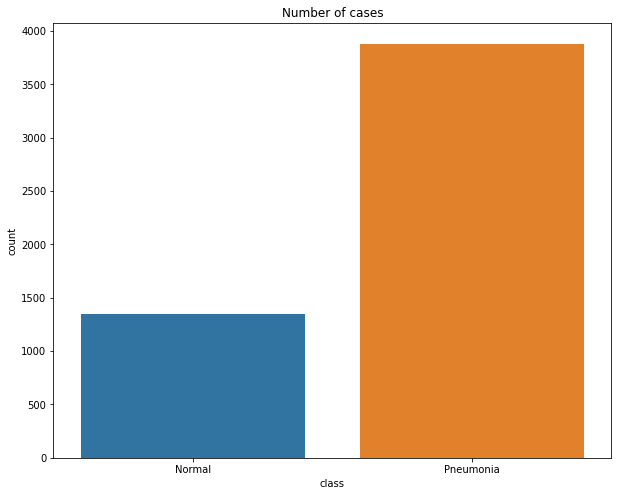

In [8]:
plt.figure(figsize=(10,8))

plt.title("Number of cases", fontsize=12)
sns.countplot(df_train["class"], data=df_train)

plt.show()

### Sample images

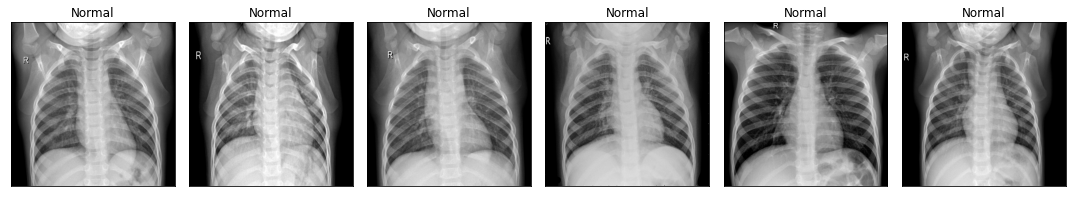

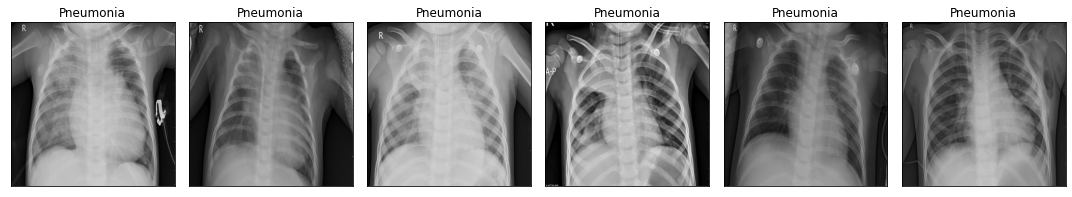

In [9]:
#normal images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#pneumonia images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Data Preparation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
                rescale=1/255)

val_datagen = ImageDataGenerator(
                rescale=1/255)

In [14]:
train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

Found 4185 validated image filenames belonging to 2 classes.


In [15]:
val_generator = val_datagen.flow_from_dataframe(
                    val_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    shuffle=False,
                    seed=7)

Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [16]:
#importing the necessary pacakages

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [17]:
# building the cnn

model = Sequential()

#convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

#pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

#2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

#3rd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#fully connected layer
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [18]:
#compiling
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [ ]:
model.summary()

The number of parameters are calculated like this:

**1. For Conv. Layers:**
   
   no. of parameters = output_channels * (input_channels * window_size + 1)
   
   
**2. For Dense Layers:**
    
   no. of parameters = output_size * (input_size + 1)

In [19]:
model_1 = model.fit(
                    train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
131/131 [==============================] - 67s 506ms/step - loss: 0.2505 - accuracy: 0.8958 - val_loss: 0.0989 - val_accuracy: 0.9656
Epoch 2/10
131/131 [==============================] - 61s 463ms/step - loss: 0.1093 - accuracy: 0.9548 - val_loss: 0.0789 - val_accuracy: 0.9733
Epoch 3/10
131/131 [==============================] - 61s 463ms/step - loss: 0.0818 - accuracy: 0.9687 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 4/10
131/131 [==============================] - 61s 464ms/step - loss: 0.0639 - accuracy: 0.9773 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 5/10
131/131 [==============================] - 61s 465ms/step - loss: 0.0523 - accuracy: 0.9814 - val_loss: 0.1114 - val_accuracy: 0.9618
Epoch 6/10
131/131 [==============================] - 61s 466ms/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.0734 - val_accuracy: 0.9761
Epoch 7/10
131/131 [==============================] - 61s 463ms/step - loss: 0.0375 - accuracy: 0.9840 - val_loss: 0.0689 - val_ac

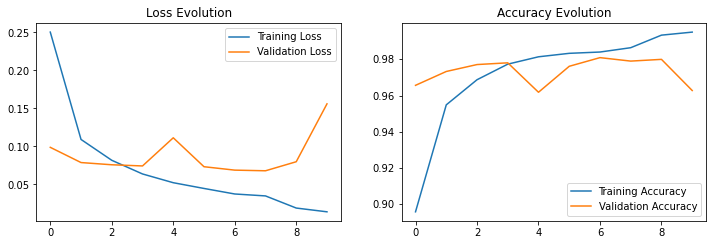

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history["loss"], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history["accuracy"], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

plt.show()

### Performance Metrics

In [21]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 7s 321ms/step - loss: 1.6982 - accuracy: 0.7724
Test Accuracy: 77.24%
131/131 [==============================] - 39s 301ms/step - loss: 0.0456 - accuracy: 0.9799
Train Accuracy: 97.99%


In [22]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

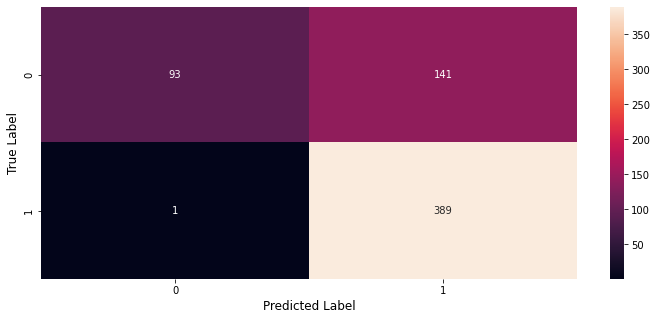

In [23]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()

In [24]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-Score: {}".format(f1_score))

Recall of the model is 1.00
Precision of the model is 0.73
F1-Score: 0.8456521739130435
